In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [8]:
archivo=open("50mm.csv","r")
archivo.readline()

tiempo=[]
posicion=[]
for linea in archivo:
    tiempo.append(float(linea.split(";")[0]))
    if linea != "\n":
        posicion.append(float(linea.split(";")[1]))

In [86]:
tiempoFinal=[]
posicionFinal=[]
for i in range(len(tiempo)):
    if tiempo[i] >= 27.766666666666666:
        tiempoFinal.append(tiempo[i])
        posicionFinal.append(posicion[i])
print(max(posicionFinal))

49.59


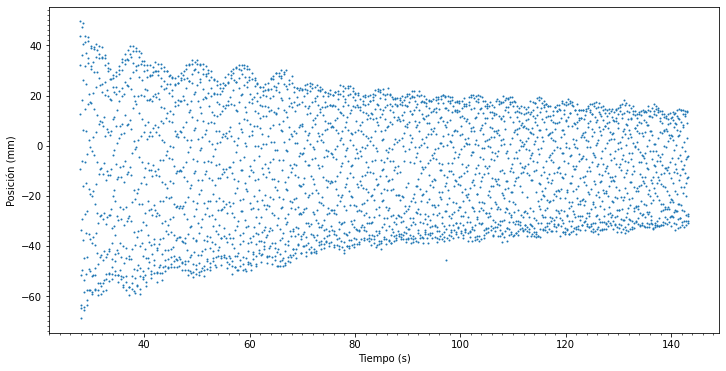

In [37]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

ax.scatter(tiempoFinal,posicionFinal,s=1)
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Posición (mm)")
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.show()

In [76]:
fourier=abs(np.fft.fft(posicionFinal,n=None,axis=-1,norm=None))
frecuencia=np.fft.fftfreq(len(tiempoFinal),tiempoFinal[1]-tiempoFinal[0])

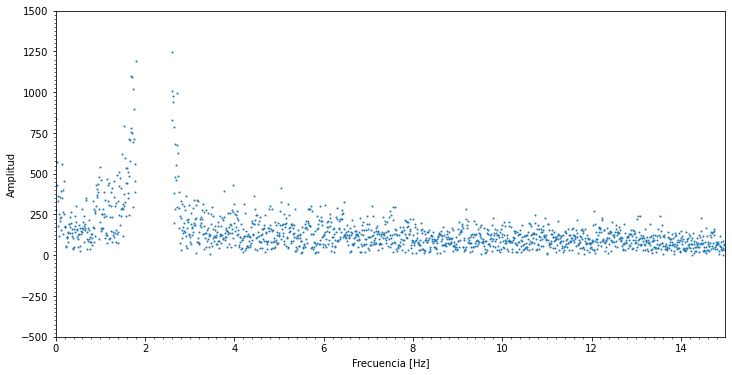

In [89]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

ax.scatter(frecuencia,fourier,s=1)
ax.set_xlabel("Frecuencia [Hz]")
ax.set_ylabel("Amplitud")
ax.set_ylim(-500,1500)
ax.set_xlim(0,max(frecuencia))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.show()

In [133]:
frecuenciaMax=0
for i in range(len(fourier)):
    if frecuencia[i]>2.6:
        if fourier[i]==1246.7425312815833:
            frecuenciaMax=frecuencia[i]
            
periodo=1/frecuenciaMax
omega=(2*np.pi)/periodo
print(f"Periodo: {periodo}")
print(f"Omega: {omega}")

Periodo: 0.38267108167772323
Omega: 16.419284361997178
